## 주거타입별 예측 모델

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings(action='ignore')

total_df = pd.read_csv("eda/data/seoul_real_estate.csv")
total_df['DEAL_YMD'] = pd.to_datetime(total_df['DEAL_YMD'], format="%Y-%m-%d")
types = list(total_df['HOUSE_TYPE'].unique())
print(types)
periods = 28

['오피스텔', '연립다세대', '아파트', '단독다가구']


In [10]:
model = Prophet()
total_df2 = total_df.loc[total_df['HOUSE_TYPE'] == types[0], ["DEAL_YMD", "OBJ_AMT"]]
result_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
result_df = result_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
model.fit(result_df)
future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future)
forecast.tail()

,ds,y
107,2023-05-13,16436.800000
108,2023-05-15,21500.277778
109,2023-05-16,20916.666667
110,2023-05-17,43074.000000
111,2023-05-18,21000.000000


오피스텔


19:52:49 - cmdstanpy - INFO - Chain [1] start processing
19:52:49 - cmdstanpy - INFO - Chain [1] done processing
19:52:49 - cmdstanpy - INFO - Chain [1] start processing
19:52:49 - cmdstanpy - INFO - Chain [1] done processing


연립다세대


19:52:50 - cmdstanpy - INFO - Chain [1] start processing
19:52:50 - cmdstanpy - INFO - Chain [1] done processing


아파트


19:52:50 - cmdstanpy - INFO - Chain [1] start processing


단독다가구


19:52:50 - cmdstanpy - INFO - Chain [1] done processing


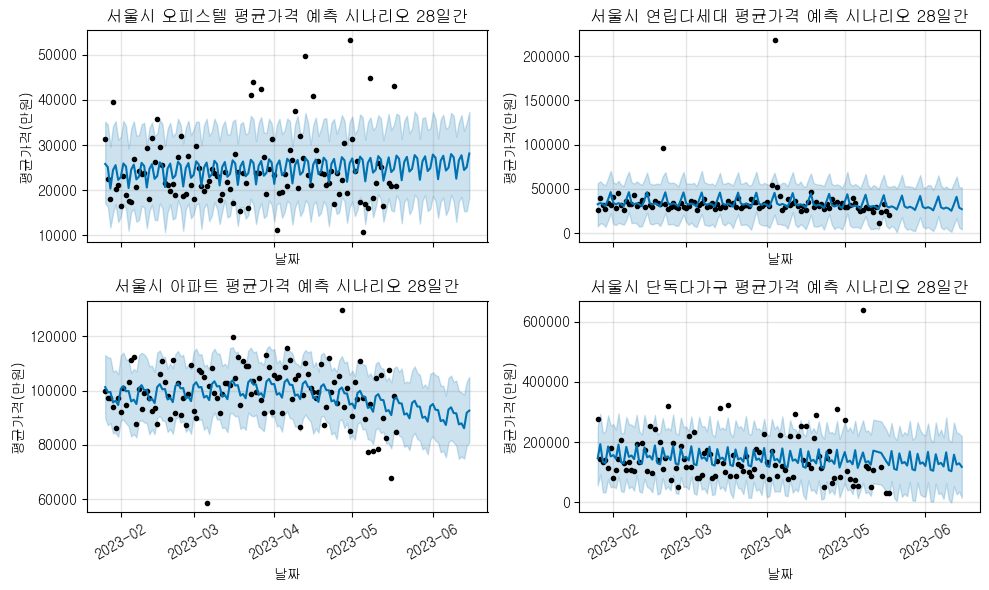

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(10, 6), sharex=True, ncols=2, nrows=2)
for i in range(0, len(types)):
    print(types[i])
    model = Prophet()
    total_df2 = total_df.loc[total_df['HOUSE_TYPE'] == types[i], ["DEAL_YMD", "OBJ_AMT"]]
    result_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
    result_df = result_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
    model.fit(result_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    if i <= 1:
        fig = model.plot(forecast, uncertainty=True, ax=ax[0, i])
        ax[0, i].set_title(f"서울시 {types[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[0, i].set_xlabel(f"날짜")
        ax[0, i].set_ylabel(f"평균가격(만원)")
        for tick in ax[0, i].get_xticklabels():
            tick.set_rotation(30)
    else:
        fig = model.plot(forecast, uncertainty=True, ax=ax[1, i-2])
        ax[1, i-2].set_title(f"서울시 {types[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[1, i-2].set_xlabel(f"날짜")
        ax[1, i-2].set_ylabel(f"평균가격(만원)")
        for tick in ax[1, i-2].get_xticklabels():
            tick.set_rotation(30)
            
plt.tight_layout()
plt.show()

## 예측 모델 지역구별 저장

In [15]:
import matplotlib.pyplot as plt
import streamlit as st
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json
import json

total_df = pd.read_csv("data/seoul_real_estate.csv")
total_df['DEAL_YMD'] = pd.to_datetime(total_df['DEAL_YMD'], format="%Y-%m-%d")
total_df = total_df[total_df['HOUSE_TYPE'] == "아파트"]

sgg_nms = sorted(list(total_df['SGG_NM'].unique()))
periods = 28
for sgg_nm in sgg_nms:
    model = Prophet()
    total_df2 = total_df.loc[total_df['SGG_NM'] == sgg_nm, ["DEAL_YMD", "OBJ_AMT"]]
    summary_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
    summary_df = summary_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
    model.fit(summary_df)
    
    with open(f'ml/models/{sgg_nm}_model.json', 'w') as fout:
        json.dump(model_to_json(model), fout)  # Save model

00:09:51 - cmdstanpy - INFO - Chain [1] start processing
00:09:51 - cmdstanpy - INFO - Chain [1] done processing
00:09:51 - cmdstanpy - INFO - Chain [1] start processing
00:09:51 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:53 - cmdstanpy - INFO - Chain [1] start processing
00:09:53 - cmdstanpy - INFO - Chain [1] done processing
00:09:53 - cmdstanpy - INFO - Chain [1] start processing
00:09:53 - cmdstanpy - INFO - Chain [1] done processing
00:09:53 - cmdstanpy - INFO - Chain [1] start processing
00:09:53 - cmdstanpy - INFO - Chain [1] done processing
00:09:54 - cmdstanpy - INFO - Chain [1] start processing
00:09:54 - cmdstanpy - INFO - Chain [1]

## 저장된 예측 모형 불러오기

In [16]:
import json 
from prophet.serialize import model_from_json

models = [] 
for sgg_nm in sgg_nms:
    print(sgg_nm)
    with open(f'ml/models/{sgg_nm}_model.json', 'r') as fin:
        model = model_from_json(json.load(fin))  # Load model
    models.append(model)
models

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [20]:
future = models[2].make_future_dataframe(periods=periods)
forecast = models[2].predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
97,2023-06-06,44535.415908,41181.769972,73241.913406,44535.415350,44535.416420,13026.520547,13026.520547,13026.520547,13026.520547,13026.520547,13026.520547,0.0,0.0,0.0,57561.936455
98,2023-06-07,44537.912587,46612.977837,78751.294420,44537.911992,44537.913127,19179.362719,19179.362719,19179.362719,19179.362719,19179.362719,19179.362719,0.0,0.0,0.0,63717.275306
99,2023-06-08,44540.409266,39200.054553,70567.533376,44540.408632,44540.409843,10460.745900,10460.745900,10460.745900,10460.745900,10460.745900,10460.745900,0.0,0.0,0.0,55001.155166
100,2023-06-09,44542.905945,40766.149357,71932.808729,44542.905275,44542.906562,11131.404572,11131.404572,11131.404572,11131.404572,11131.404572,11131.404572,0.0,0.0,0.0,55674.310517
101,2023-06-10,44545.402624,49108.443952,79632.724331,44545.401916,44545.403291,19728.401553,19728.401553,19728.401553,19728.401553,19728.401553,19728.401553,0.0,0.0,0.0,64273.804177


## 전체 자치구별 모델 시각화

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


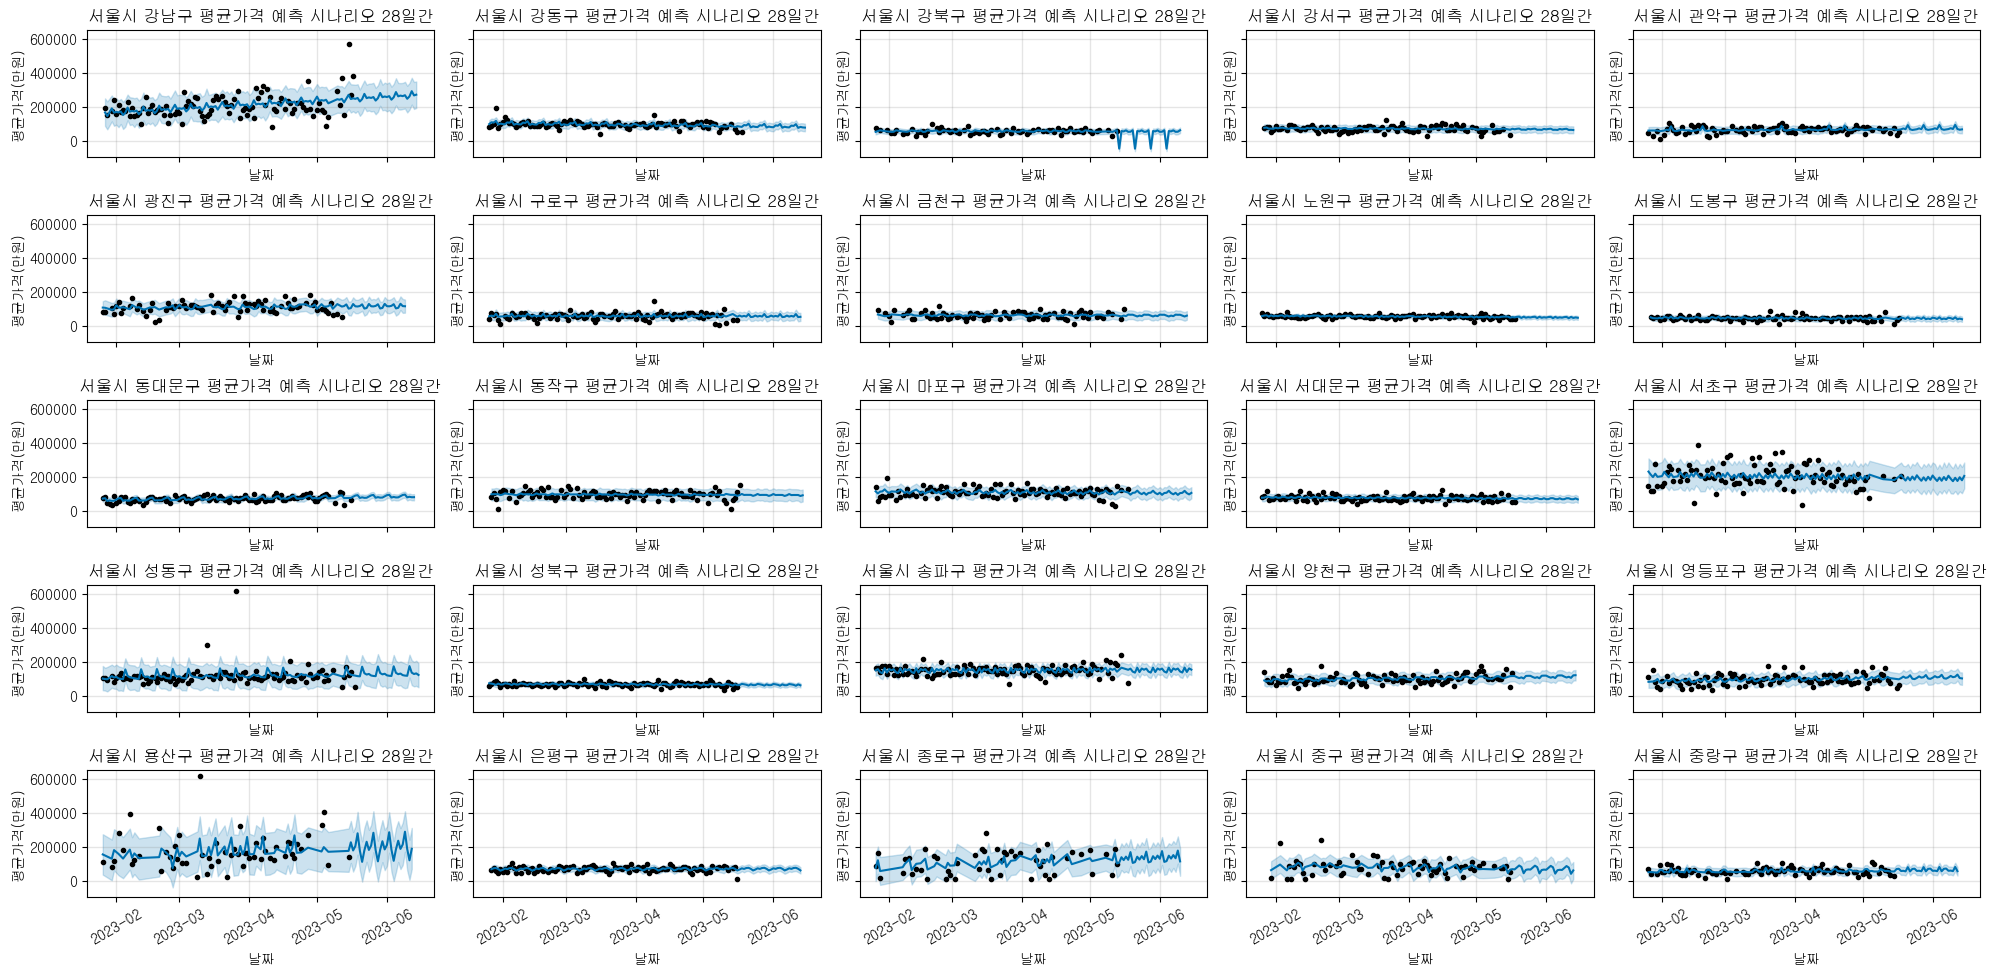

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
periods = 28
fig, ax = plt.subplots(figsize=(20, 10), sharex=True, sharey=True, ncols=5, nrows=5)
for i in range(0, len(sgg_nms)):
    future = models[i].make_future_dataframe(periods=periods)
    forecast = models[i].predict(future)
    print(sgg_nms[i])
    if i <= 4:

        fig = models[i].plot(forecast, uncertainty=True, ax=ax[0, i])
        ax[0, i].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[0, i].set_xlabel(f"날짜")
        ax[0, i].set_ylabel(f"평균가격(만원)")
        for tick in ax[0, i].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 9:

        fig = models[i].plot(forecast, uncertainty=True, ax=ax[1, i-5])
        ax[1, i-5].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[1, i-5].set_xlabel(f"날짜")
        ax[1, i-5].set_ylabel(f"평균가격(만원)")
        for tick in ax[1, i-5].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 14:

        fig = models[i].plot(forecast, uncertainty=True, ax=ax[2, i-10])
        ax[2, i-10].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[2, i-10].set_xlabel(f"날짜")
        ax[2, i-10].set_ylabel(f"평균가격(만원)")
        for tick in ax[2, i-10].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 19:

        fig = models[i].plot(forecast, uncertainty=True, ax=ax[3, i-15])
        ax[3, i-15].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[3, i-15].set_xlabel(f"날짜")
        ax[3, i-15].set_ylabel(f"평균가격(만원)")
        for tick in ax[3, i-15].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 24:

        fig = models[i].plot(forecast, uncertainty=True, ax=ax[4, i-20])
        ax[4, i-20].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[4, i-20].set_xlabel(f"날짜")
        ax[4, i-20].set_ylabel(f"평균가격(만원)")
        for tick in ax[4, i-20].get_xticklabels():
            tick.set_rotation(30)
    else:
        pass 
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()